# Zillow regression project notes

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns

## Contents <a name='contents'></a>

*Links will only work on a local copy, not in browser on GitHub*

1. <a href='#wrangle'>wrangle data</a>
    1. <a href='#getdata'> `get_zillow_data()`</a>
    2. <a href='#missingdata'>Dealing with unnessecary columns</a>
2. <a href='#cleaning'>Cleaning and preparing the data</a>
3. <a href='#explore'>Explore the data</a>
    1. <a href='#univariate'>Univariate</a>
    2. <a href='#multivariate'>Multivariate</a>

## Wrangle data <a name='wrangle'></a>

<a href='#contents'>Top</a>

### Description of `wrangle.py`

The custom module `wrangle.py` contains functions that access the database, clean and prepare the data.

In [2]:
import wrangle

### Getting the data from the database <a name = 'getdata'></a>

Use the `get_zillow_data()` function to access the database or the .csv file to retrieve the data.  It takes the following arguments:
- `query_db=False` : forces a database query even if the .csv file for the data is present
It returns the following:
- A dataframe containing the data from the database.

In [3]:
df = wrangle.get_zillow_data()

Returning saved csv file.


In [4]:
original_shape = df.shape
df

,id,parcelid,airconditioningtypeid,architecturalstyletypeid,basementsqft,bathroomcnt,bedroomcnt,buildingclasstypeid,buildingqualitytypeid,calculatedbathnbr,...,numberofstories,fireplaceflag,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,taxdelinquencyflag,taxdelinquencyyear,censustractandblock
0,123199,11508656,NaN,NaN,NaN,2.0,2.0,NaN,4.0,2.0,...,NaN,NaN,58010.0,320531.0,2016.0,262521.0,3687.75,NaN,NaN,6.037621e+13
1,1739447,12854999,NaN,NaN,NaN,2.0,4.0,NaN,6.0,2.0,...,NaN,NaN,149166.0,426363.0,2016.0,277197.0,5047.80,NaN,NaN,6.037403e+13
2,421832,11532400,NaN,NaN,NaN,1.0,3.0,NaN,4.0,1.0,...,NaN,NaN,78493.0,224273.0,2016.0,145780.0,2700.53,NaN,NaN,6.037276e+13
3,184933,12074210,NaN,NaN,NaN,2.0,2.0,NaN,6.0,2.0,...,NaN,NaN,95459.0,477322.0,2016.0,381863.0,5291.95,NaN,NaN,6.037301e+13
4,1049449,11978142,NaN,NaN,NaN,1.0,2.0,NaN,4.0,1.0,...,NaN,NaN,142245.0,643551.0,2016.0,501306.0,9267.35,NaN,NaN,6.037183e+13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52436,2680825,14177337,NaN,NaN,NaN,3.0,4.0,NaN,NaN,3.0,...,1.0,NaN,96892.0,290017.0,2016.0,193125.0,7243.84,NaN,NaN,6.059012e+13
52437,1274952,12340380,NaN,NaN,NaN,1.0,2.0,NaN,4.0,1.0,...,NaN,NaN,63718.0,150574.0,2016.0,86856.0,2047.91,NaN,NaN,6.037553e+13
52438,2768495,13023520,NaN,NaN,NaN,1.0,3.0,NaN,4.0,1.0,...,NaN,NaN,80921.0,258626.0,2016.0,177705.0,3263.64,NaN,NaN,6.037405e+13
52439,2611275,10846370,NaN,NaN,NaN,2.0,3.0,NaN,6.0,2.0,...,NaN,NaN,55067.0,88795.0,2016.0,33728.0,1120.13,NaN,NaN,6.037129e+13


<a href='#content'>Top</a>

### Dealing with the missing data <a name = 'missingdata'></a>

There are a lot of null values.  Use `return_col_percent_null()` to see how much per column.

In [5]:
df_missing_data = wrangle.return_col_percent_null(df)

In [6]:
df_missing_data.sort_values('percent_null', ascending=False)

,column_name,percent_null,count_null
15,finishedsquarefeet15,1.0000,52441
7,buildingclasstypeid,1.0000,52441
14,finishedsquarefeet13,1.0000,52441
42,storytypeid,0.9991,52394
4,basementsqft,0.9991,52394
47,yardbuildingsqft26,0.9988,52378
3,architecturalstyletypeid,0.9987,52371
44,typeconstructiontypeid,0.9986,52365
50,fireplaceflag,0.9985,52360
17,finishedsquarefeet6,0.9969,52276


Drop any column that has more than 0.01 of data missing. Also drop any dataleakage columns; these are `taxamount` and `structuretaxvaluedollarcnt`.

Investigate `calculatedbathnbr`, `finishedsquarefeet12`, `fullbathcnt`.

In [7]:
df[['calculatedbathnbr', 'fullbathcnt','bathroomcnt', 'bedroomcnt']]

,calculatedbathnbr,fullbathcnt,bathroomcnt,bedroomcnt
0,2.0,2.0,2.0,2.0
1,2.0,2.0,2.0,4.0
2,1.0,1.0,1.0,3.0
3,2.0,2.0,2.0,2.0
4,1.0,1.0,1.0,2.0
...,...,...,...,...
52436,3.0,3.0,3.0,4.0
52437,1.0,1.0,1.0,2.0
52438,1.0,1.0,1.0,3.0
52439,2.0,2.0,2.0,3.0


Drop `calculatedbathnbr` and `fullbathcnt`, the data can be calculated from the other two columns

In [8]:
df[['finishedsquarefeet12', 'calculatedfinishedsquarefeet']]

,finishedsquarefeet12,calculatedfinishedsquarefeet
0,1110.0,1110.0
1,1288.0,1288.0
2,948.0,948.0
3,1498.0,1498.0
4,1228.0,1228.0
...,...,...
52436,2055.0,2055.0
52437,899.0,899.0
52438,964.0,964.0
52439,1554.0,1554.0


This one looks like a repetition of data.  Drop `finishedsquarefeet12`. `rmcnt` should be at least the sum of `bathroomcnt` and `bedroomcnt`, but isn't always.  Drop it. Consider a `min_room` column instead.

In [9]:
(df['roomcnt'] >= (df['bathroomcnt']+df['bedroomcnt'])).mean()

0.2617608359871093

There is already latitude and longitude.  Plus it looks like some of the zip codes are outside of the range for California. These can be dropped too.  Also, drop the census blocks, as the project is not going to go into census data.

In [10]:
df['regionidzip'].describe()

count     52415.000000
mean      96635.846380
std        4605.107533
min       95982.000000
25%       96206.000000
50%       96412.000000
75%       96995.000000
max      399675.000000
Name: regionidzip, dtype: float64

In addition, drop the columns that are foreign keys: `propertylandusetypeid` and `regionidcounty`.  `propertycountylandusecode` might be useful, but not for the MVP.  `assessmentyear` can calso be dropped as it is all the same value, 2016.

In [11]:
df[['assessmentyear']].value_counts()

assessmentyear
2016.0            52441
dtype: int64

`id` can also be dropped, use `parcelid` instead

In [12]:
df = wrangle.zillow_drop_columns(df)
df

,parcelid,bathroomcnt,bedroomcnt,calculatedfinishedsquarefeet,fips,latitude,longitude,lotsizesquarefeet,yearbuilt,taxvaluedollarcnt
0,11508656,2.0,2.0,1110.0,6037.0,33879703.0,-118406604.0,1350.0,1912.0,320531.0
1,12854999,2.0,4.0,1288.0,6037.0,33976669.0,-117834686.0,8386.0,1963.0,426363.0
2,11532400,1.0,3.0,948.0,6037.0,33990330.0,-118414200.0,4700.0,1947.0,224273.0
3,12074210,2.0,2.0,1498.0,6037.0,34181237.0,-118226109.0,8297.0,1947.0,477322.0
4,11978142,1.0,2.0,1228.0,6037.0,34124301.0,-118178791.0,3760.0,1931.0,643551.0
...,...,...,...,...,...,...,...,...,...,...
52436,14177337,3.0,4.0,2055.0,6059.0,33879788.0,-117874125.0,6960.0,1959.0,290017.0
52437,12340380,1.0,2.0,899.0,6037.0,33907707.0,-118150457.0,6527.0,1953.0,150574.0
52438,13023520,1.0,3.0,964.0,6037.0,34112534.0,-117903417.0,5985.0,1954.0,258626.0
52439,10846370,2.0,3.0,1554.0,6037.0,34175592.0,-118436145.0,5880.0,1952.0,88795.0


In [13]:
wrangle.return_col_percent_null(df)

,column_name,percent_null,count_null
0,parcelid,0.0000,0
1,bathroomcnt,0.0000,0
2,bedroomcnt,0.0000,0
3,calculatedfinishedsquarefeet,0.0016,82
4,fips,0.0000,0
5,latitude,0.0000,0
6,longitude,0.0000,0
7,lotsizesquarefeet,0.0070,369
8,yearbuilt,0.0022,116
9,taxvaluedollarcnt,0.0000,1


Because the remaining null values are so little of the data, they can be simply dropped.

Much better.  It is worth noting that any of the data dropped can be joined back to dataframe for exploration if needed.

<a href='#contents'>Top</a>

## Cleaning and preparing the data <a name='cleaning'></a>

- Clear the `fips` column to say the county name.
- fix latitude and longitude values

In [14]:
df.columns

Index(['parcelid', 'bathroomcnt', 'bedroomcnt', 'calculatedfinishedsquarefeet',
       'fips', 'latitude', 'longitude', 'lotsizesquarefeet', 'yearbuilt',
       'taxvaluedollarcnt'],
      dtype='object')

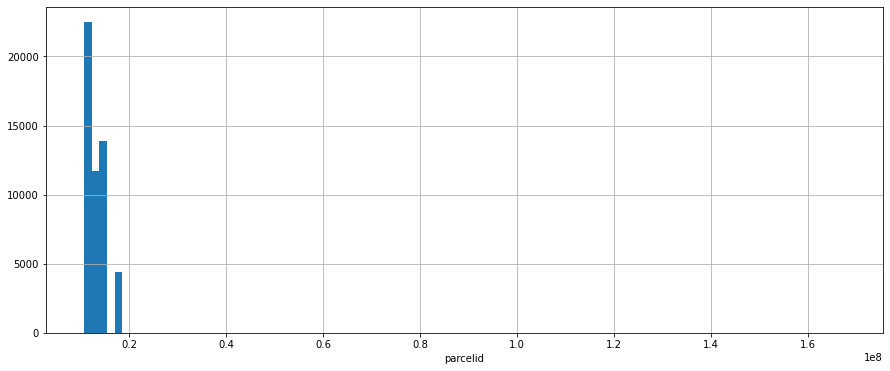

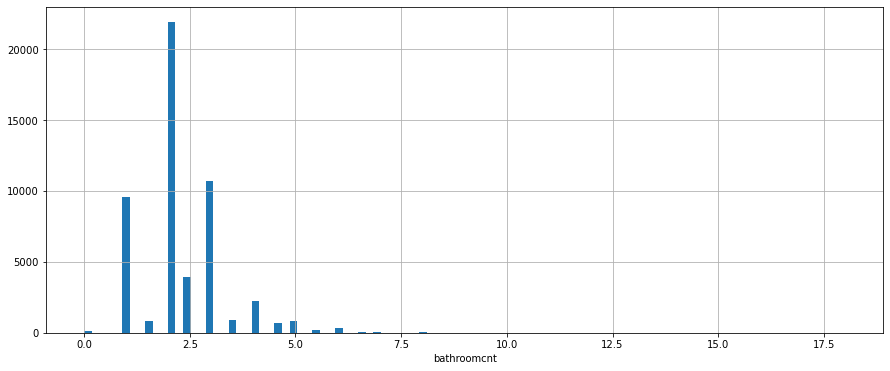

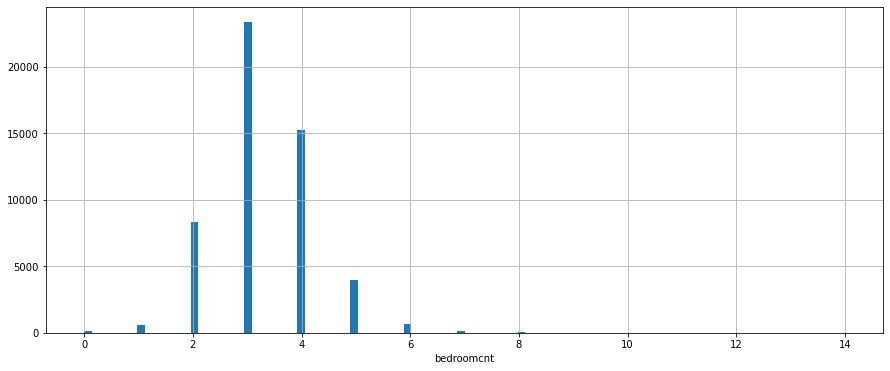

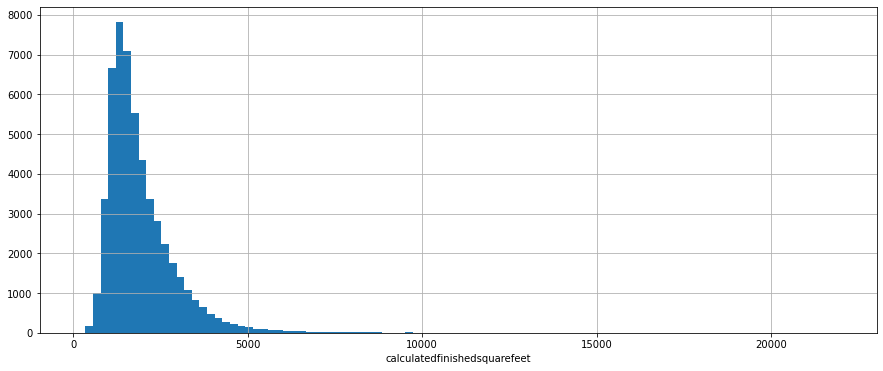

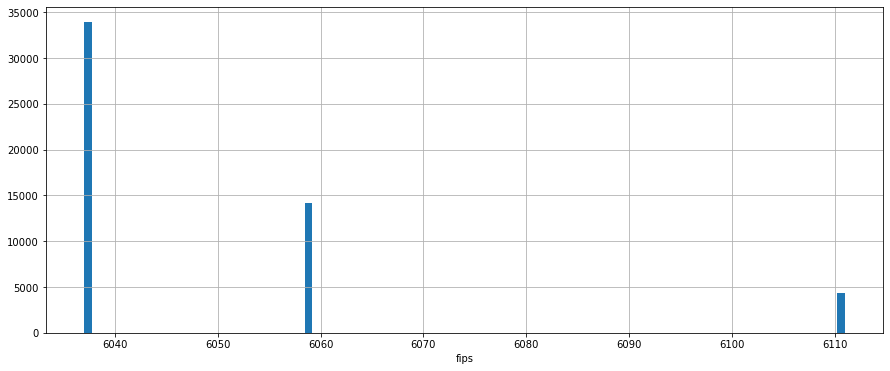

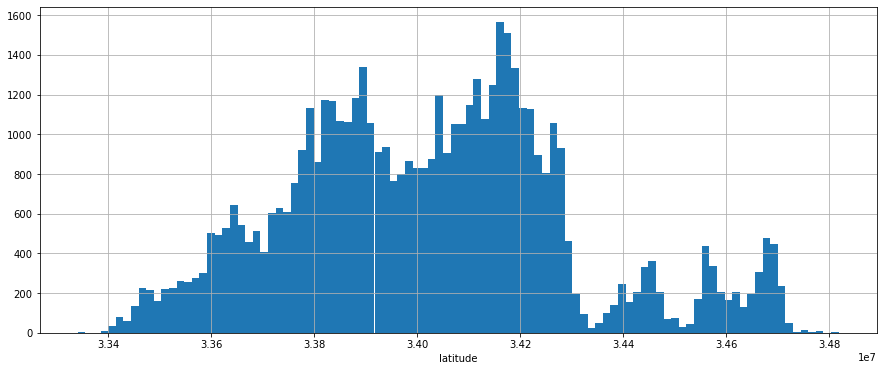

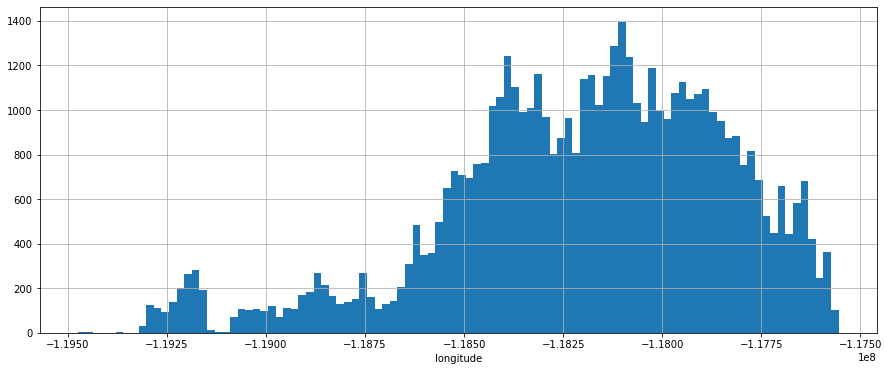

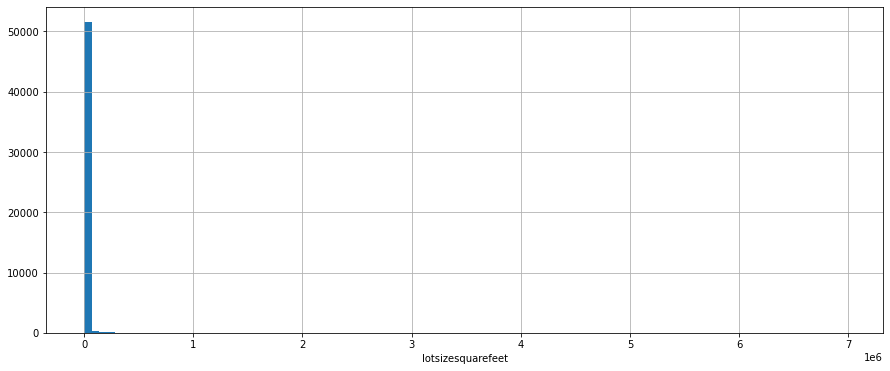

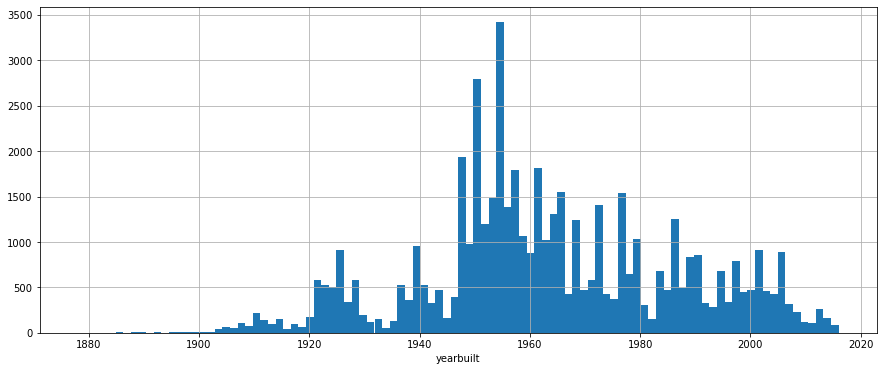

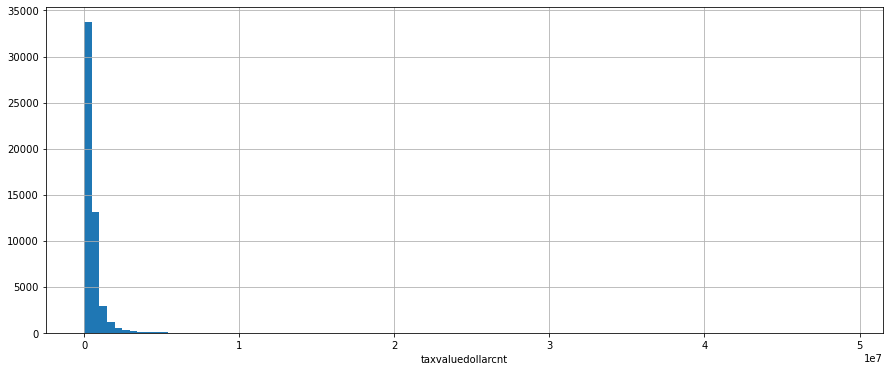

In [15]:
for column in df.columns:
    plt.figure(figsize=(15,6))
    df[column].hist(bins=100)
    plt.xlabel(column)
    plt.show()

In [16]:
df.describe()

,parcelid,bathroomcnt,bedroomcnt,calculatedfinishedsquarefeet,fips,latitude,longitude,lotsizesquarefeet,yearbuilt,taxvaluedollarcnt
count,5.244100e+04,52441.000000,52441.000000,52359.000000,52441.000000,5.244100e+04,5.244100e+04,5.207200e+04,52325.000000,5.244000e+04
mean,1.299912e+07,2.299403,3.300681,1922.890754,6049.132149,3.402254e+07,-1.181942e+08,1.133962e+04,1963.393884,5.296882e+05
std,3.411444e+06,1.022772,0.949094,1004.365838,21.029067,2.739787e+05,3.566626e+05,8.674763e+04,23.133571,7.518946e+05
min,1.071186e+07,0.000000,0.000000,128.000000,6037.000000,3.334062e+07,-1.194754e+08,2.360000e+02,1878.000000,1.000000e+03
25%,1.151022e+07,2.000000,3.000000,1268.000000,6037.000000,3.382691e+07,-1.184007e+08,5.583000e+03,1950.000000,1.937475e+05
50%,1.257764e+07,2.000000,3.000000,1659.000000,6037.000000,3.402378e+07,-1.181531e+08,6.840500e+03,1961.000000,3.736120e+05
75%,1.412953e+07,3.000000,4.000000,2306.000000,6059.000000,3.418715e+07,-1.179292e+08,8.798250e+03,1979.000000,6.193012e+05
max,1.676878e+08,18.000000,14.000000,21929.000000,6111.000000,3.481877e+07,-1.175546e+08,6.971010e+06,2016.000000,4.906124e+07


A major source of outliers is `lotsizesquarefeet`.

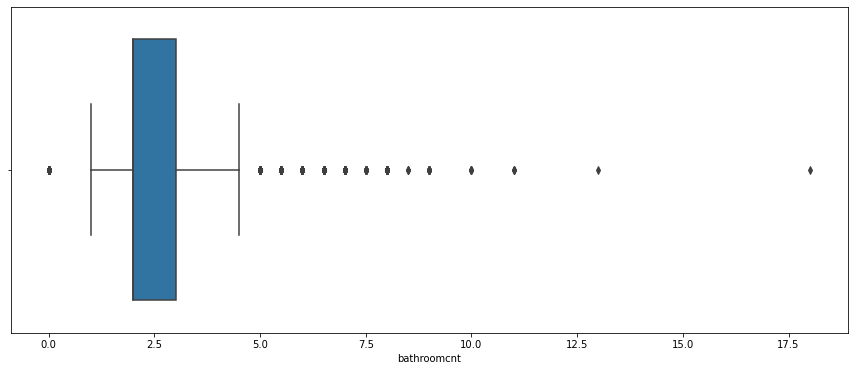

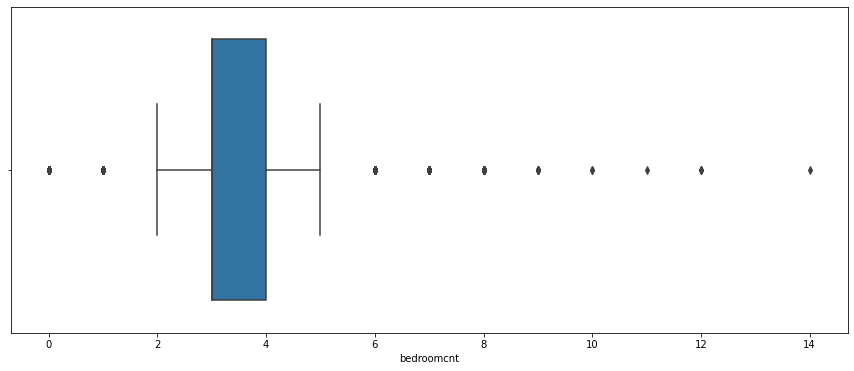

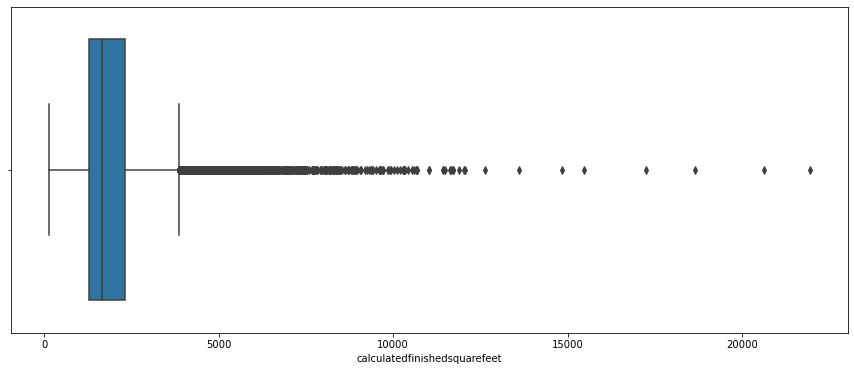

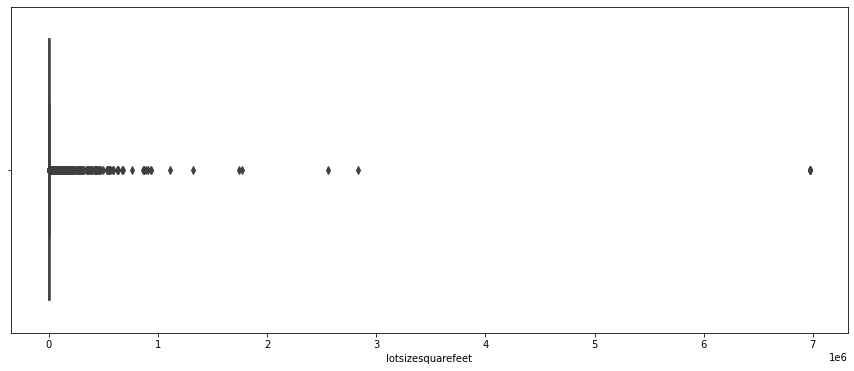

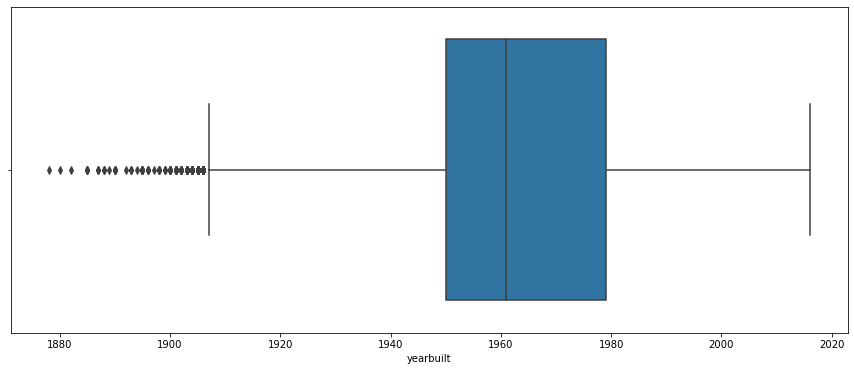

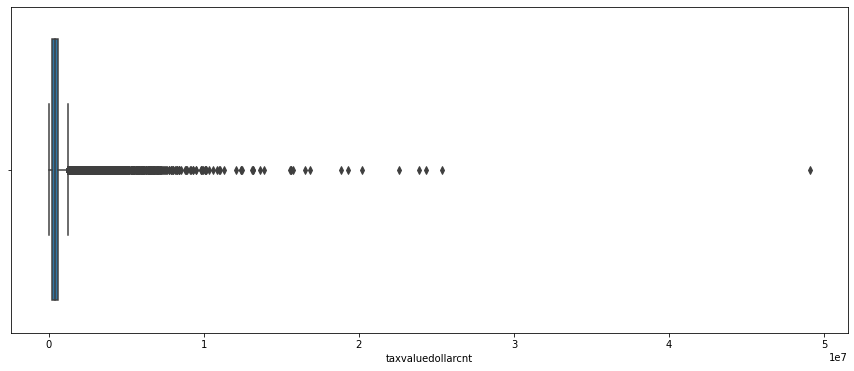

In [17]:
for column in ['bathroomcnt', 'bedroomcnt', 'calculatedfinishedsquarefeet', 'lotsizesquarefeet', 'yearbuilt', 'taxvaluedollarcnt']:
    plt.figure(figsize=(15,6))
    sns.boxplot(x=column, data=df)
    plt.show()

Some of the ranges are a bit funny, consider:
- `bathroomcnt` and  `bedroomcnt` of 0 or larger than 6 can be excluded.  The average zillow user will probably not buy one of these
- `calculatedfinishedsquarefeet` in an extreme; mainly very small and very large.  Exlcude any house smaller than 150 square feet or larger than 6000.
- `lotsizesquarefeet` has some very extreme outliers (the max is 160 acres), exclude any lots that are above 5 acres (2.178002e+5 square feet; and this still leaves a great many outliers).

Also, some of the data can be cast into better types:
- Anything with a max below 255 can be `uint8` and others can be `uint`
- `taxvaluedollarcnt`, `calculatedfinishedsquarefeet` and `lotsizesquarefeet` can be cast as `uint`

`fips` can be mapped to county names and `latitude` and `logitude` need to be multiplied to get the correct values.

In [18]:
df = wrangle.prepare_zillow_data(df)

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 51295 entries, 0 to 52440
Data columns (total 10 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   parcelid                      51295 non-null  int64  
 1   bathroomcnt                   51295 non-null  float64
 2   bedroomcnt                    51295 non-null  uint8  
 3   calculatedfinishedsquarefeet  51295 non-null  uint64 
 4   latitude                      51295 non-null  float64
 5   longitude                     51295 non-null  float64
 6   lotsizesquarefeet             51295 non-null  float64
 7   yearbuilt                     51295 non-null  uint64 
 8   taxvaluedollarcnt             51295 non-null  uint64 
 9   county                        51295 non-null  object 
dtypes: float64(4), int64(1), object(1), uint64(3), uint8(1)
memory usage: 4.0+ MB


In [20]:
(df.shape[0])/original_shape[0]

0.9781468698156023

No more nulls and $ \approx 0.98$ of the data is retained.

<a href='#contents'>Top</a>

## Explore data <a name='explore'></a>

First split the data to explore it.

In [21]:
train, validate, test = wrangle.split_zillow_data(df)

In [22]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28725 entries, 52283 to 15115
Data columns (total 10 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   parcelid                      28725 non-null  int64  
 1   bathroomcnt                   28725 non-null  float64
 2   bedroomcnt                    28725 non-null  uint8  
 3   calculatedfinishedsquarefeet  28725 non-null  uint64 
 4   latitude                      28725 non-null  float64
 5   longitude                     28725 non-null  float64
 6   lotsizesquarefeet             28725 non-null  float64
 7   yearbuilt                     28725 non-null  uint64 
 8   taxvaluedollarcnt             28725 non-null  uint64 
 9   county                        28725 non-null  object 
dtypes: float64(4), int64(1), object(1), uint64(3), uint8(1)
memory usage: 2.2+ MB


In [23]:
train.head(3)

,parcelid,bathroomcnt,bedroomcnt,calculatedfinishedsquarefeet,latitude,longitude,lotsizesquarefeet,yearbuilt,taxvaluedollarcnt,county
52283,10883656,1.0,2,806,34.189934,-118.420067,7126.0,1951,114761,Los Angeles
314,11420675,1.0,2,972,33.923917,-118.353665,4852.0,1920,319803,Los Angeles
8507,12605471,1.0,3,973,33.815068,-118.282460,5717.0,1952,39915,Los Angeles


Will use the `explore.py` to see what it in the data.

In [24]:
import explore

<a href='#contents'>Top</a>

### Univariate data

Consider the univariate data. <a name='univariate'></a>

In [25]:
train.describe()[['bathroomcnt', 'bedroomcnt', 'calculatedfinishedsquarefeet', 'lotsizesquarefeet', 'yearbuilt', 'taxvaluedollarcnt']]

,bathroomcnt,bedroomcnt,calculatedfinishedsquarefeet,lotsizesquarefeet,yearbuilt,taxvaluedollarcnt
count,28725.000000,28725.000000,28725.000000,28725.000000,28725.000000,2.872500e+04
mean,2.268129,3.290896,1878.211070,9048.826527,1963.222385,4.969264e+05
std,0.931701,0.891973,859.317692,10857.692476,22.811497,5.485281e+05
min,1.000000,1.000000,326.000000,236.000000,1878.000000,1.000000e+03
25%,2.000000,3.000000,1266.000000,5568.000000,1950.000000,1.917610e+05
50%,2.000000,3.000000,1653.000000,6804.000000,1960.000000,3.708290e+05
75%,3.000000,4.000000,2277.000000,8691.000000,1979.000000,6.087910e+05
max,6.500000,6.000000,6000.000000,216820.000000,2015.000000,1.561849e+07


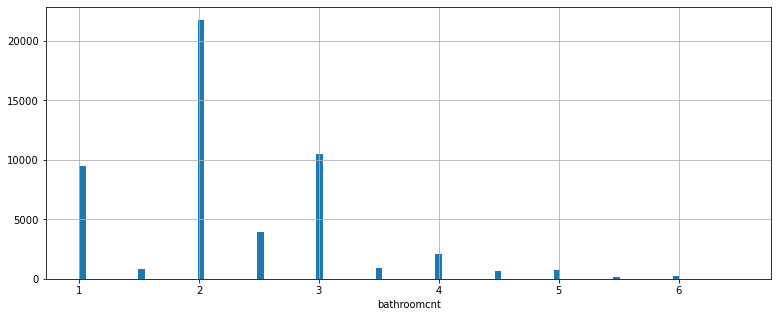

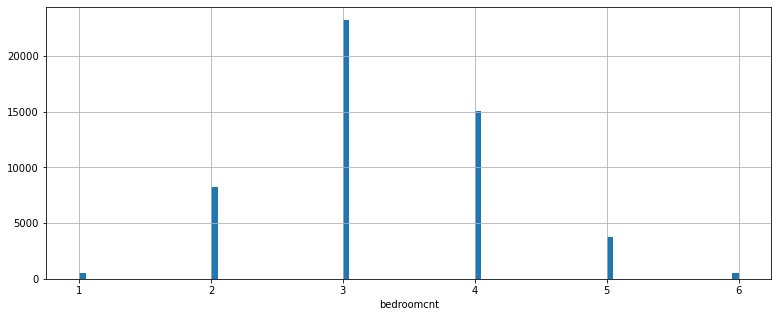

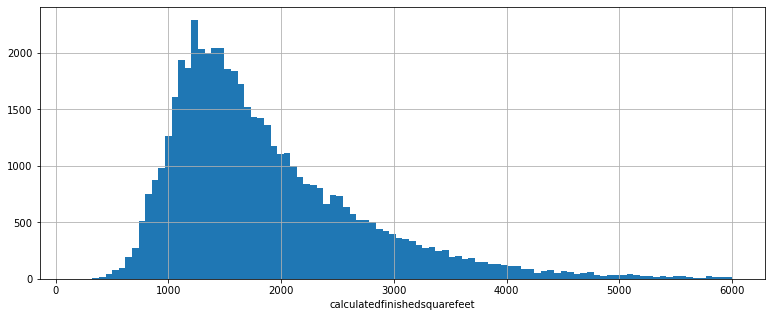

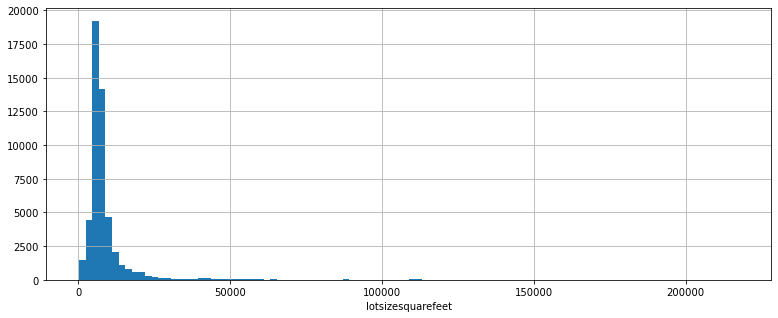

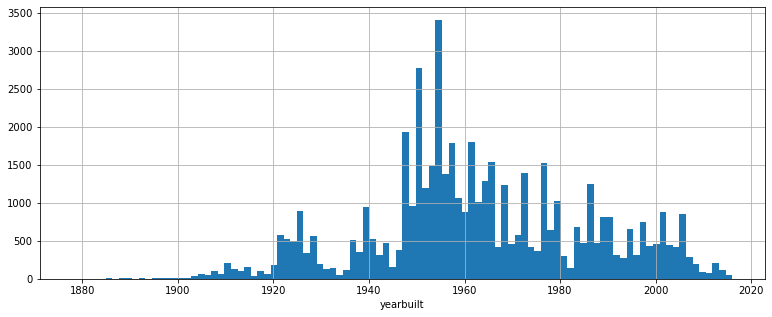

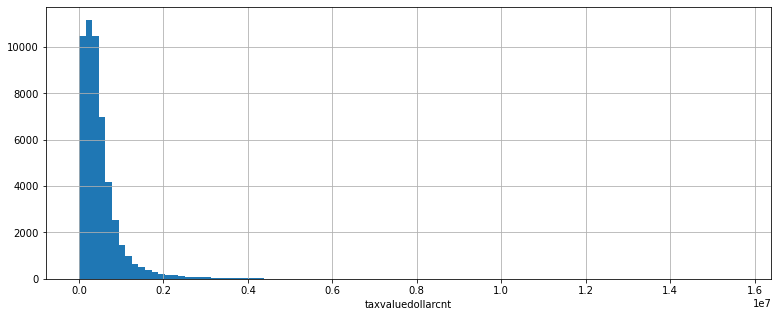

In [26]:
for column in ['bathroomcnt', 'bedroomcnt', 'calculatedfinishedsquarefeet', 'lotsizesquarefeet', 'yearbuilt', 'taxvaluedollarcnt']:
    plt.figure(figsize=(13,5))
    df[column].hist(bins=100)
    plt.xlabel(column)
    plt.show()

Also consider boxplots

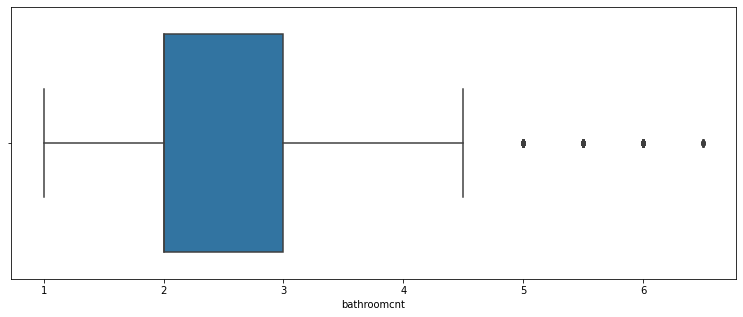

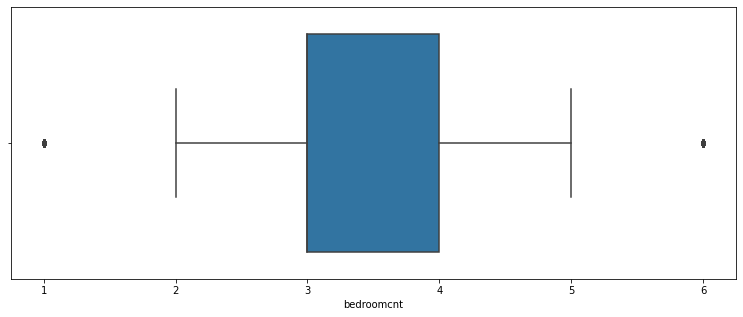

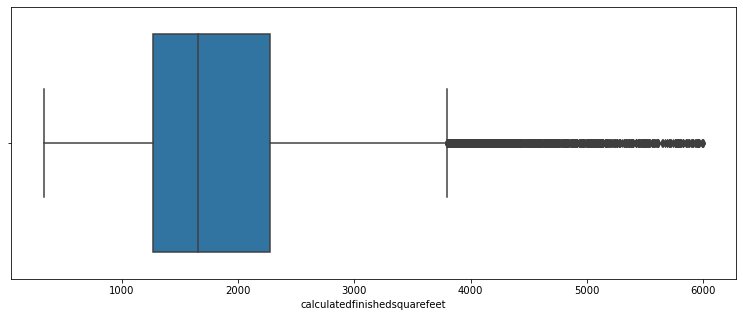

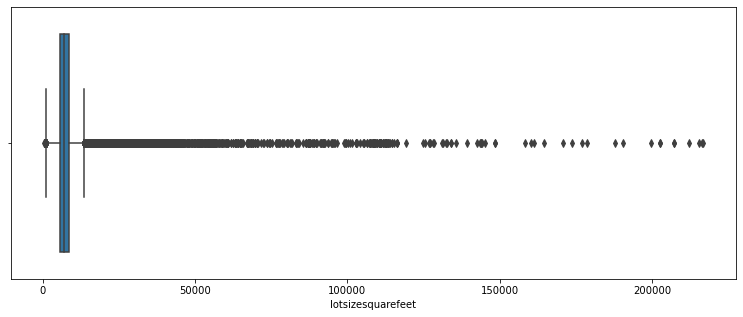

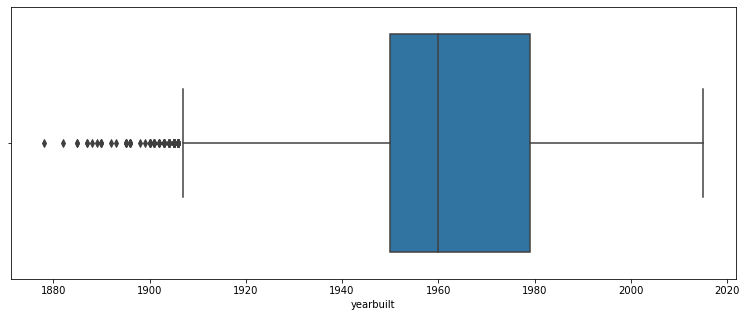

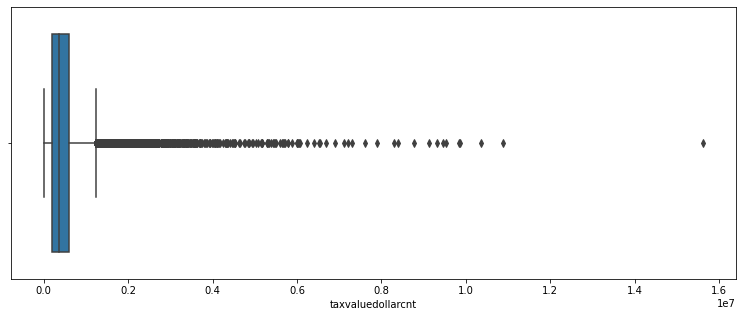

In [27]:
for column in ['bathroomcnt', 'bedroomcnt', 'calculatedfinishedsquarefeet', 'lotsizesquarefeet', 'yearbuilt', 'taxvaluedollarcnt']:
    plt.figure(figsize=(13,5))
    sns.boxplot(x=column, data=train)
    plt.show()

Most of the data is positively skewed with a lot of outliers.

<a href='#contents'>Top</a>

### Multivariate exploration <a name='multivariate'></a>

First consider all the variables plotted against the target.

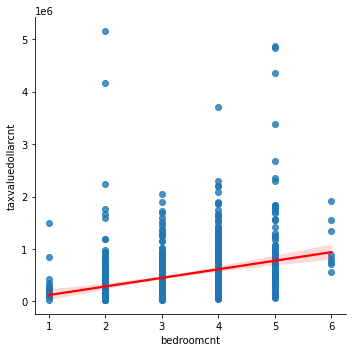

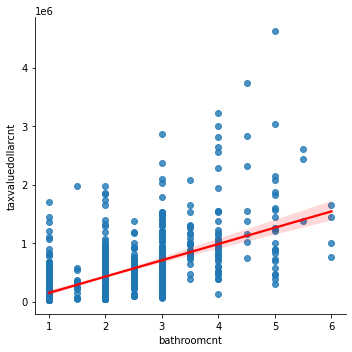

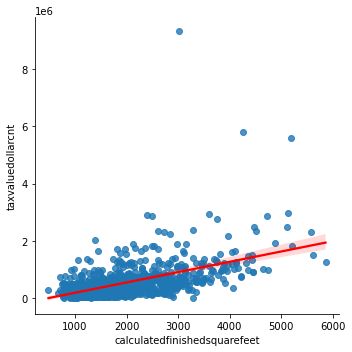

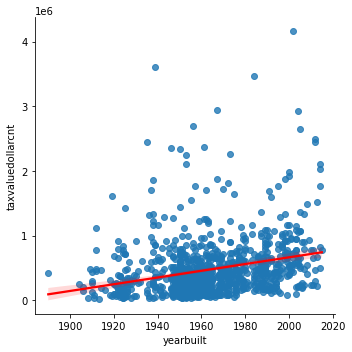

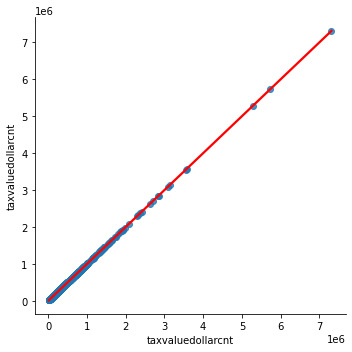

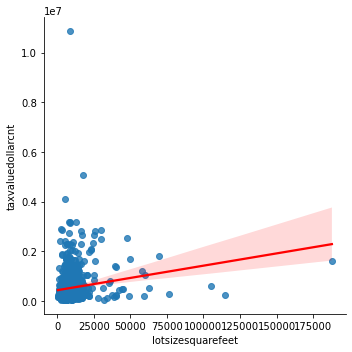

In [28]:
explore.plot_variable_pairs(train, columns_y=['taxvaluedollarcnt'])

`calculatedsquarefeet`, `bedroomcnt`, and `bathroomcnt` look like the most valuable.  Look at this nmumerically:

In [33]:
r_values = explore.r_values_vars(train)
r_values[r_values['column1_x_column2'].str.contains('taxvaluedollarcnt')].sort_values('r', ascending=False)

,column1_x_column2,r,p-value,reject_null
11,calculatedfinishedsquarefeet x taxvaluedollarcnt,0.552838,0.000000e+00,True
8,bathroomcnt x taxvaluedollarcnt,0.493155,0.000000e+00,True
4,bedroomcnt x taxvaluedollarcnt,0.240511,0.000000e+00,True
13,yearbuilt x taxvaluedollarcnt,0.185270,3.592117e-220,True
14,lotsizesquarefeet x taxvaluedollarcnt,0.154783,1.717529e-153,True


Confirms that these are the highest correlated variables.  Especially `calculatedfinishedsquarefeet` and `bathroomcnt`.

In [35]:
r_values

,column1_x_column2,r,p-value,reject_null
0,bedroomcnt x bathroomcnt,0.627306,0.000000e+00,True
1,bedroomcnt x calculatedfinishedsquarefeet,0.629736,0.000000e+00,True
2,bedroomcnt x yearbuilt,0.391004,0.000000e+00,True
3,bedroomcnt x lotsizesquarefeet,0.144145,3.579256e-133,True
4,bedroomcnt x taxvaluedollarcnt,0.240511,0.000000e+00,True
5,bathroomcnt x calculatedfinishedsquarefeet,0.843115,0.000000e+00,True
6,bathroomcnt x yearbuilt,0.536816,0.000000e+00,True
7,bathroomcnt x lotsizesquarefeet,0.218675,5.166550e-308,True
8,bathroomcnt x taxvaluedollarcnt,0.493155,0.000000e+00,True
9,calculatedfinishedsquarefeet x yearbuilt,0.478951,0.000000e+00,True
